In [1]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [10]:
#check is there any NaN or null value in Dataframe 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [12]:
# Dynamic current year 
current_date = date.today()
df['Current_Year']= current_date.year

In [13]:
df['Current_Year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
296    2021
297    2021
298    2021
299    2021
300    2021
Name: Current_Year, Length: 301, dtype: int64

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year'],
      dtype='object')

In [15]:
newdf = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year']]

In [16]:
newdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [17]:
#dynamically find number of year old car
newdf['year_old'] = current_date.year - newdf.Year

In [18]:
newdf.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_Year', 'year_old'],
      dtype='object')

In [19]:
newdf = newdf[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'year_old']]

In [20]:
newdf = pd.get_dummies(newdf)

In [21]:
# forgot to add drop_first in dummy trap
#removing columns
newdf.columns
newdf = newdf[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'year_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]

In [22]:
newdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [23]:
newdf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
year_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


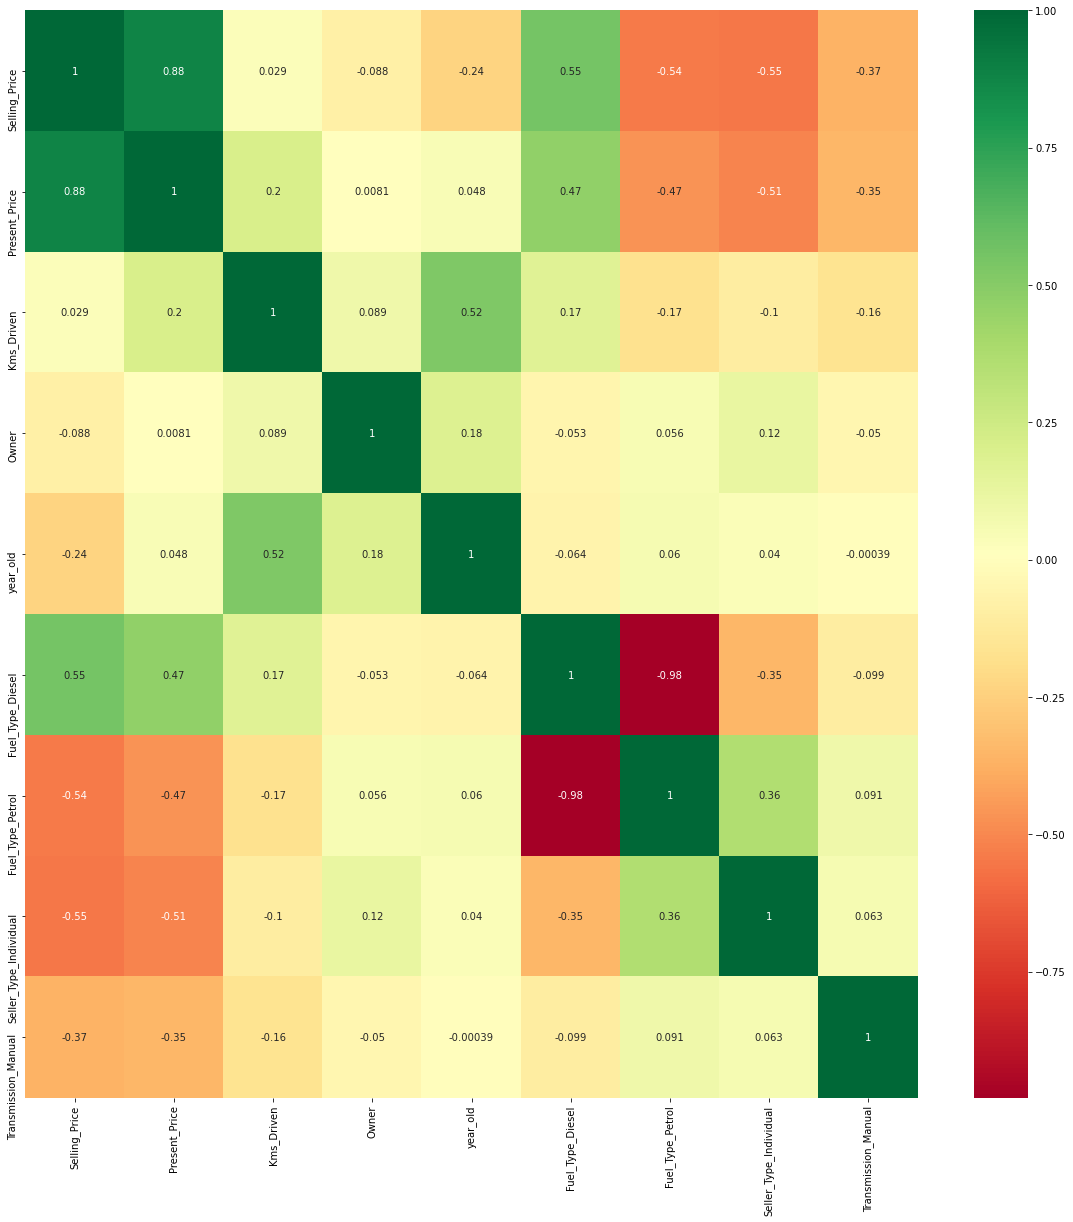

In [24]:
core = newdf.corr()
coreplot = core.index
plt.figure(figsize=(20,20))
p = sns.heatmap(newdf[coreplot].corr(), annot=True, cmap="RdYlGn")

In [25]:
newdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [26]:
# A is a independant feature and B is the dependent feature 
A = newdf.iloc[:,1:]
B = newdf.iloc[:,0]

In [27]:
A.head()

,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
B.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(A,B)

ExtraTreesRegressor()

In [30]:
model.feature_importances_

array([0.37140355, 0.0431923 , 0.00043979, 0.07663423, 0.22087753,
       0.01851967, 0.12629289, 0.14264004])

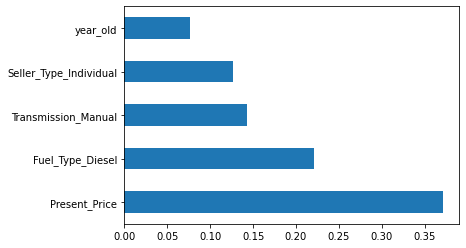

In [31]:
# graph of feature importance
feat_imp = pd.Series(model.feature_importances_, index=A.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2)

In [33]:
A_train.shape

(240, 8)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [35]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [40]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(A_train,B_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
predictions = rf_random.predict(A_test)

In [43]:
predictions

array([ 0.26717735,  2.79948367, 13.8891658 ,  4.88485746,  6.57233773,
        5.3536626 ,  0.33912771,  2.40324483,  1.13819711,  1.74057235,
        0.65586654,  5.69203308,  4.40622455,  6.34890261,  0.54285733,
        1.21114632,  7.34261079,  4.96538968,  7.65926596,  8.09682277,
        0.28373373,  0.67358303,  7.96849837,  0.54134092, 10.26812055,
        1.1547379 ,  7.17552774,  2.82484704,  0.31978917,  7.38027663,
        0.43218246,  2.30764513,  3.56061159,  0.54817159,  6.66924322,
        0.56553069, 22.19749223, 13.56404258,  0.30175015,  0.54039184,
        1.14957368,  5.51997973,  5.78543507,  7.66919788,  4.70472161,
        5.35070574,  1.1613697 ,  9.49810374,  9.75249525,  1.21793961,
        7.70020734,  0.68521313,  0.63569619,  7.90720226,  5.6475611 ,
        8.61516458,  4.87918021,  1.8095242 ,  1.17471716,  7.35590686,
        0.65992682])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

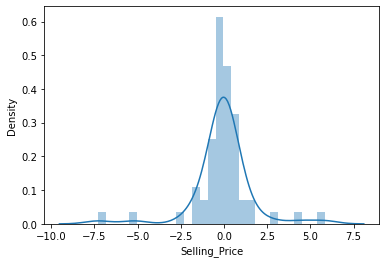

In [44]:
sns.distplot(B_test-predictions)

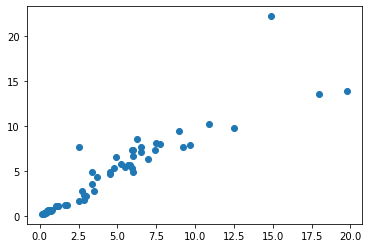

In [45]:
plt.scatter(B_test,predictions)

In [46]:
import pickle

In [47]:
#store file 
file = open('Car_price_randomforest_regression.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)